In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import IsolationForest


In [3]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata


In [4]:
from ucimlrepo import fetch_ucirepo

In [5]:
air_quality = fetch_ucirepo(id=360)

In [6]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [7]:
data = air_quality.data.features
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [13]:
df.shape

(9357, 4)

Data Preprocessing Steps

In [8]:
df = data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [9]:
df.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [12]:
df.shape

(9357, 4)

In [11]:
df.dtypes

CO(GT)      float64
C6H6(GT)    float64
NOx(GT)       int64
NO2(GT)       int64
dtype: object

In [14]:
#Parameters for isolation forest
n_estimators =100
contamination = 0.01
sample_size = 256


In [20]:
model = IsolationForest(n_estimators = n_estimators,
        contamination = contamination,
        max_samples = sample_size,
        random_state = 42)

In [21]:
model.fit(df)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

In [24]:
import warnings
warnings.filterwarnings("ignore")

#anomaly_labels will be -1 for anamolies and 1 for normal data points
anomaly_labels = model.predict(df)
df['anamoly']= anomaly_labels

In [25]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anamoly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [27]:
#check the value counts of the anamoly labels
df['anamoly'].value_counts()

anamoly
 1    9263
-1      94
Name: count, dtype: int64

In [37]:
features = ['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']
X = df[features]
model = IsolationForest(random_state=42)
model.fit(X)

IsolationForest(random_state=42)

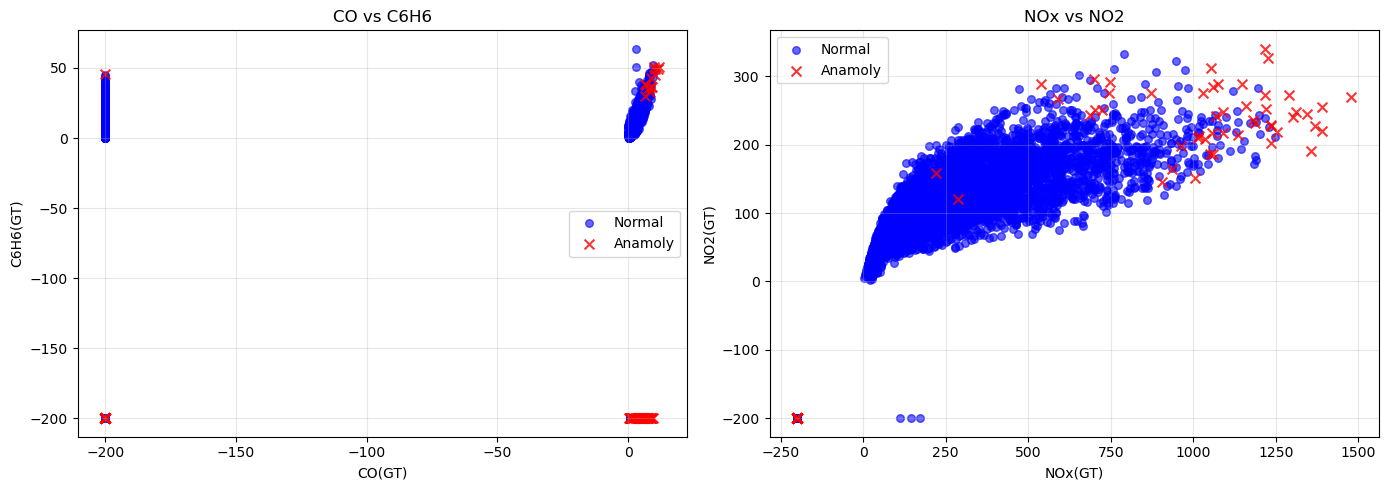

Normal data points: 9263
Anomalies detected: 94


In [38]:
fiq,axes = plt.subplots(1,2,figsize=(14,5))
normal = df[df['anamoly']==1]
anomaly = df[df['anamoly']==-1]

axes[0].scatter(normal['CO(GT)'],normal['C6H6(GT)'],color='blue',label ="Normal",alpha =0.6,s=30)
axes[0].scatter(anomaly['CO(GT)'],anomaly['C6H6(GT)'],color='red',label ="Anamoly",alpha =0.8,s=50,marker='x')
axes[0].set_xlabel("CO(GT)")
axes[0].set_ylabel("C6H6(GT)")
axes[0].set_title("CO vs C6H6")
axes[0].legend()
axes[0].grid(True,alpha=0.3)

axes[1].scatter(normal['NOx(GT)'],normal['NO2(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
axes[1].scatter(anomaly['NOx(GT)'],anomaly['NO2(GT)'],color='red',label ="Anamoly",alpha =0.8,s=50,marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

In [39]:
import joblib
model_path  = "D:\\5U8\\17-02-26\\isolation_forest_air_quality.pkl"
joblib.dump(model,model_path)

['D:\\5U8\\17-02-26\\isolation_forest_air_quality.pkl']